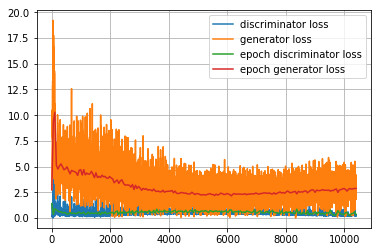

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt

step = 0
dis_loss = []
gen_loss = []

regex1 = re.compile(".* dis_loss (\S+).* gen_loss (\S+)")
regex2 = re.compile(".* training_dis_loss (\S+).* training_gen_loss (\S+)")

with open("nohup.out") as f:
    lines = f.readlines()

    for line in lines:
        m1 = regex1.match(line)
        if m1:
            step += 1
            dis_loss.append(float(m1.group(1)))
            gen_loss.append(float(m1.group(2)))
            if step == 1:
                epoch_x = [step]
                epoch_dis_loss = [float(m1.group(1))]
                epoch_gen_loss = [float(m1.group(2))]

        m2 = regex2.match(line)
        if m2:
            epoch_x.append(step)
            epoch_dis_loss.append(float(m2.group(1)))
            epoch_gen_loss.append(float(m2.group(2)))

plt.plot(np.array(dis_loss), label="discriminator loss")
plt.plot(np.array(gen_loss), label="generator loss")
plt.plot(np.array(epoch_x), np.array(epoch_dis_loss), label="epoch discriminator loss")
plt.plot(np.array(epoch_x), np.array(epoch_gen_loss), label="epoch generator loss")
plt.grid(True)
plt.legend()
plt.show()

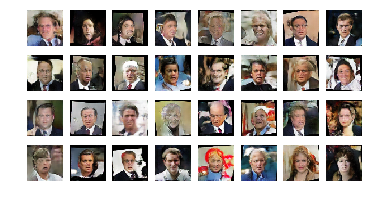

In [2]:
%matplotlib inline
import os
import mxnet as mx
from test import test

test(
    batch_size = 32,
    seed_size = 128,
    filters = 64,
    context = mx.cpu()
)
